In [21]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

from sklearn.svm import SVC

### Create sample data
Here we create a sample data X1,y1 and then modify it a bit to see the effect of adding points to the data on the hyperplane.

In [22]:
X1 = np.array([[-0.6,-0.8],[-0.5,-0.6],[-1, -1], [-2, -1], [1, 1], [2, 1], [0.5,0.8], [0.75, 0.75]])
y1 = np.array([1, 1, 1, 1, 2, 2, 2, 2])

# Add a point on both the sides that doesn't affect hyperplane
X2 = np.array([[-0.6,-0.8],[-0.5,-0.6],[-1, -1], [-2, -1], [-1.5,-0.8], [1, 1], [2, 1], [0.5,0.8], [0.75, 0.75], [1.5,1]])
y2 = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

# Add a point on both the sides that affect hyperplane
X3 = np.array([[-0.6,-0.8],[-0.5,-0.6],[-1, -1], [-2, -1], [-0.5,0], [1, 1], [2, 1], [0.5,0.8], [0.75, 0.75], [-1,0.5]])
y3 = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

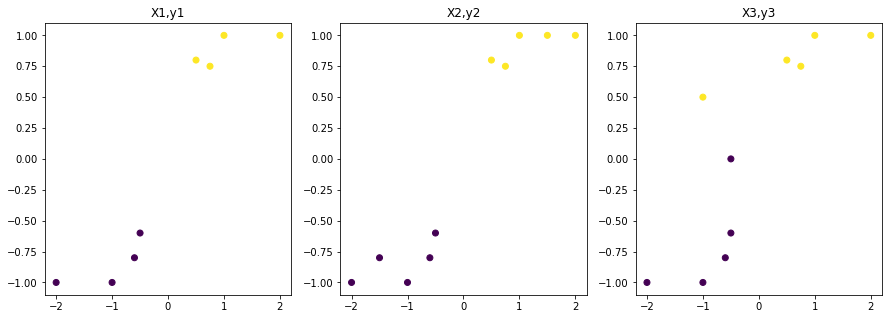

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(X1[:, 0], X1[:, 1], c = y1)
ax[0].set_title('X1,y1')
ax[1].scatter(X2[:, 0], X2[:, 1], c = y2)
ax[1].set_title('X2,y2')
ax[2].scatter(X3[:, 0], X3[:, 1], c = y3)
ax[2].set_title('X3,y3')
plt.show()

## Train the model and plot the hyperplane

In [24]:
# From https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
def plot_svm(classifier,X,y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )
    # plot support vectors
    ax.scatter(
        classifier.support_vectors_[:, 0],
        classifier.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )


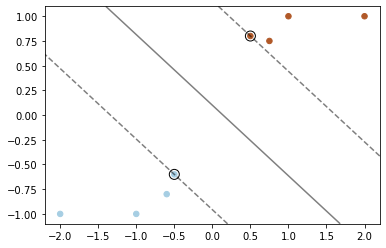

In [25]:
# We try to fit the classifier to the sample data X1, y1
X, y = X1, y1
SVC_classifier = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVC_classifier.fit(X, y)
plot_svm(SVC_classifier, X,y)

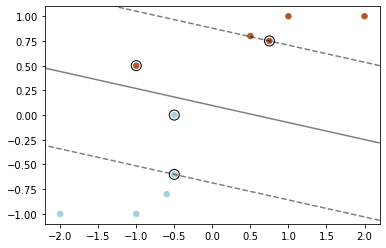

In [27]:
X, y = X3, y3
SVC_classifier = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVC_classifier.fit(X, y)
plot_svm(SVC_classifier, X,y)

## Tuning of parameter C
Soft margin classifier

In [28]:
X4 = np.array([[-0.6,-0.8],[-0.5,-0.6],[-1, -1], [-2, -1], [-0.5,0], [0.5, 0.25],
               [1, 1], [2, 1], [0.5,0.8], [0.75, 0.75], [-1,0.5], [0, -0.25]])
y4 = np.array([1, 1, 1, 1, 1, 1, 
                2, 2, 2, 2, 2, 2])
X, y = X4, y4
@interact
def tune_par_c(par_c=widgets.FloatSlider(min=0.1, max=100, step=0.1, value=1)):
    SVCClf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False, C=par_c)
    SVCClf.fit(X, y)
    plot_svm(SVCClf, X,y)

interactive(children=(FloatSlider(value=1.0, description='par_c', min=0.1), Output()), _dom_classes=('widget-i…

# Use of Kernels
We will look into the classifiers based on Polynomial, RBF kernels.

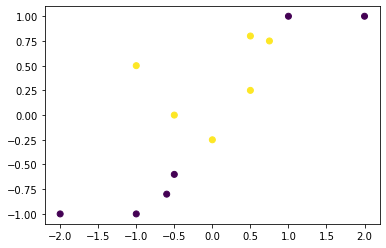

In [29]:
# Modify the previous data a bit
X5 = np.array([[-0.6,-0.8],[-0.5,-0.6],[-1, -1], [-2, -1], [-0.5,0], [0.5, 0.25],
               [1, 1], [2, 1], [0.5,0.8], [0.75, 0.75], [-1,0.5], [0, -0.25]])
y5 = np.array([1, 1, 1, 1, 2, 2, 
                1, 1, 2, 2, 2, 2])

X, y = X5, y5
plt.scatter(X[:, 0], X[:, 1], c = y)

In [33]:
X, y = X5, y5
@interact
def tune_par_c_d(par_c=widgets.FloatSlider(min=0.1, max=100, step=0.1, value=1),
                par_d=widgets.FloatSlider(min=1, max=5, step=1, value=1), 
                par_gamma=widgets.FloatSlider(min=1, max=5, step=1, value=1)):
    #SVCClf = SVC(kernel = 'poly',gamma = par_gamma, shrinking = False, C=par_c, degree=par_d, coef0=0)
    #SVCClf = SVC(kernel = 'rbf',gamma = par_gamma, shrinking = False, C=par_c, degree=par_d)
    SVCClf = SVC(kernel = 'sigmoid',gamma = par_gamma, shrinking = False, C=par_c, degree=par_d)
    SVCClf.fit(X, y)
    #plot_svm(SVCClf, X,y)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -4
    x_max = 4
    y_min = -4
    y_max = 4

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = SVCClf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    #plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

interactive(children=(FloatSlider(value=1.0, description='par_c', min=0.1), FloatSlider(value=1.0, description…